In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"data_arenda.xlsx")

In [105]:
df.head()

,sku,Price,Square,Rooms,Area_score,ЖК,Первиннежитло,Disttometro,time_to_metro
0,22015935,93333,120,4,4,1,0,0.77,1
1,22020975,80000,75,2,4,1,0,0.59,1
2,21649711,93333,94,3,4,1,0,0.59,1
3,21530695,72000,100,3,2,1,0,0.99,1
4,22093967,53333,101,4,3,1,0,0.46,1


In [104]:
df.dtypes

sku                int64
Price              int64
Square             int64
Rooms              int64
Area_score         int64
ЖК                 int64
Первиннежитло      int64
Disttometro      float64
time_to_metro      int64
dtype: object

In [6]:
df.describe()

,sku,Price,Square,Rooms,Area_score,ЖК,Первиннежитло,Disttometro,time_to_metro
count,9.164000e+03,9.164000e+03,9164.000000,9164.000000,9164.000000,9164.000000,9164.000000,9164.000000,9164.000000
mean,2.122116e+07,6.466890e+04,104.381493,2.651135,3.485487,0.266259,0.182671,2.940261,1.132475
std,1.392294e+06,2.513072e+05,61.374061,1.067292,0.703825,0.442026,0.386418,36.993366,0.380005
min,1.117980e+07,7.000000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,0.010000,1.000000
25%,2.001979e+07,3.191500e+04,63.000000,2.000000,3.000000,0.000000,0.000000,0.400000,1.000000
50%,2.204859e+07,4.521300e+04,90.000000,3.000000,4.000000,0.000000,0.000000,0.560000,1.000000
75%,2.217075e+07,7.446800e+04,130.000000,3.000000,4.000000,1.000000,0.000000,0.770000,1.000000
max,2.224159e+07,2.295212e+07,1600.000000,10.000000,4.000000,1.000000,1.000000,1000.000000,3.000000


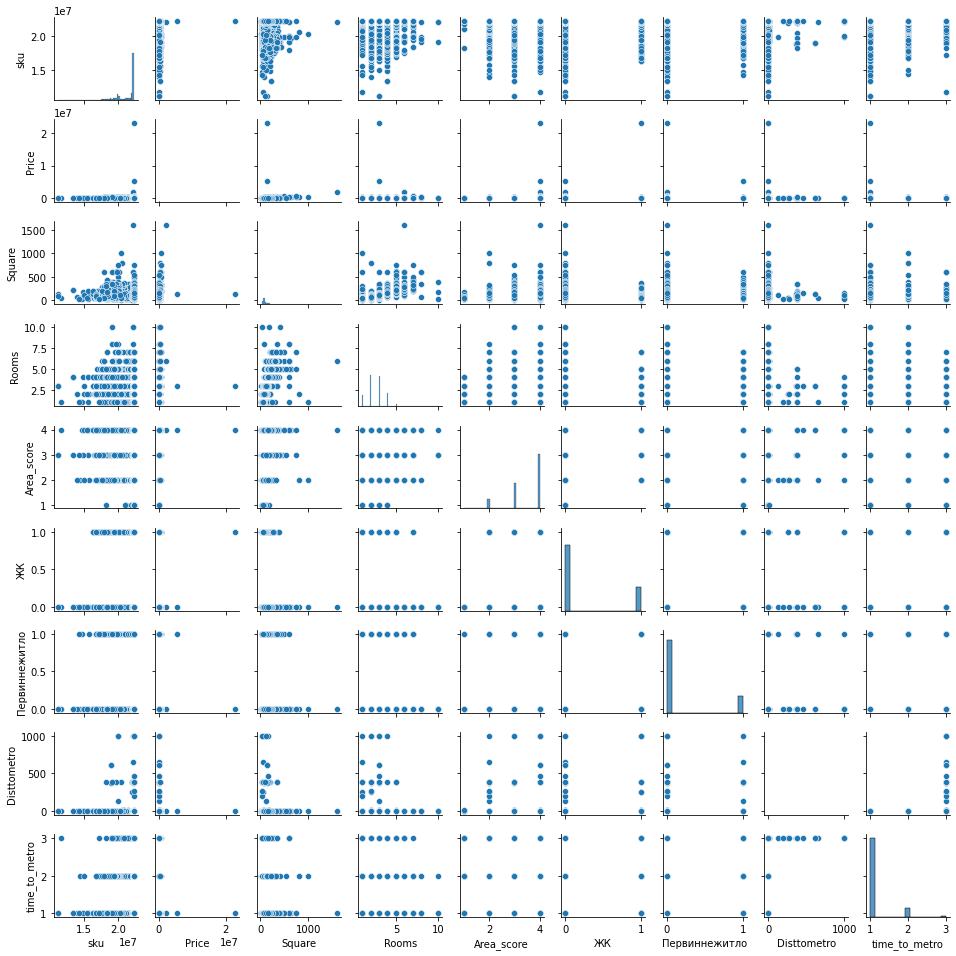

In [8]:
import seaborn as sns

sns.pairplot(df)

In [7]:
df.corr()

,sku,Price,Square,Rooms,Area_score,ЖК,Первиннежитло,Disttometro,time_to_metro
sku,1.000000,-0.201236,-0.168727,-0.152956,-0.164915,-0.224260,-0.022787,0.017383,0.095522
Price,-0.201236,1.000000,0.749243,0.527368,0.257936,0.026236,0.032268,-0.016376,-0.121230
Square,-0.168727,0.749243,1.000000,0.714677,0.115579,-0.132878,0.005644,-0.023254,-0.054338
Rooms,-0.152956,0.527368,0.714677,1.000000,0.082409,-0.108287,0.026156,-0.014780,-0.044055
Area_score,-0.164915,0.257936,0.115579,0.082409,1.000000,0.094674,-0.026842,-0.046173,-0.329171
ЖК,-0.224260,0.026236,-0.132878,-0.108287,0.094674,1.000000,0.056148,0.011994,-0.124745
Первиннежитло,-0.022787,0.032268,0.005644,0.026156,-0.026842,0.056148,1.000000,0.048630,0.018459
Disttometro,0.017383,-0.016376,-0.023254,-0.014780,-0.046173,0.011994,0.048630,1.000000,0.306711
time_to_metro,0.095522,-0.121230,-0.054338,-0.044055,-0.329171,-0.124745,0.018459,0.306711,1.000000


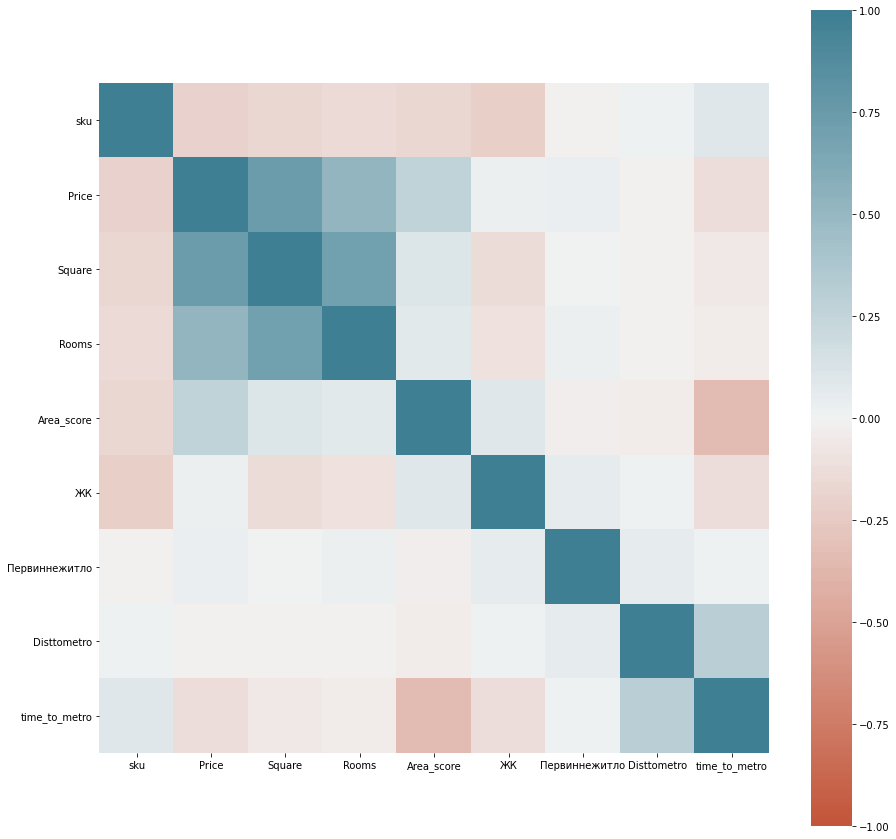

In [8]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

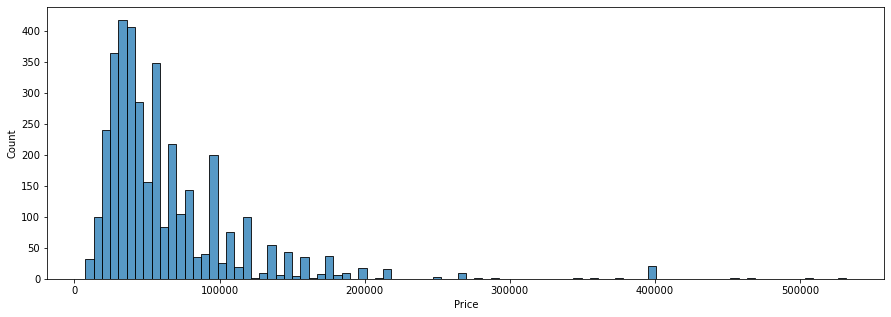

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(data = df, x = 'Price', ax=ax)


C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

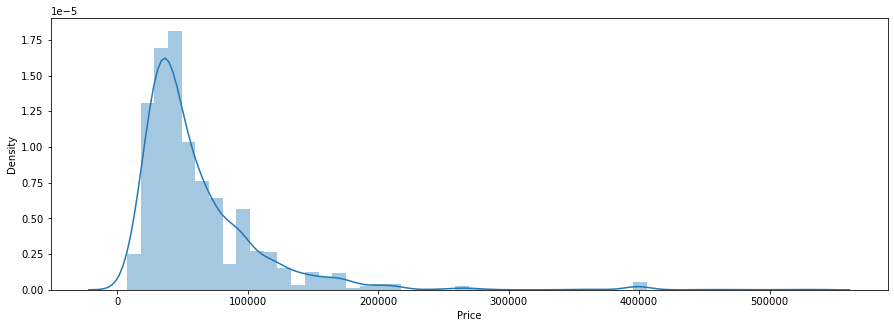

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))


sns.distplot(df['Price'], ax=ax)


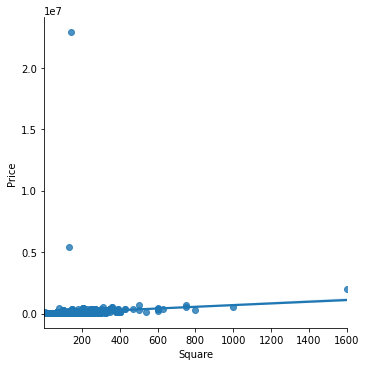

In [106]:

sns.lmplot(x = 'Square', y = 'Price', data = df)

In [141]:
index_to_del = df[df['Price']==max(df['Price'])].index[0]
df.drop(index_to_del, axis=0, inplace=True)
index_to_del = df[df['Price']==max(df['Price'])].index[0]
df.drop(index_to_del, axis=0, inplace=True)

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [115]:
reg = LinearRegression()

## Все доступные параметры

In [142]:
X = df[['Square', 'Rooms', 'Area_score', 'ЖК', 'Первиннежитло','Disttometro', 'time_to_metro']]
y = df['Price']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [137]:
reg.fit(X_train, y_train)

LinearRegression()

In [144]:
reg.coef_

array([  741.87726062, -4783.80687716, 10993.66930511, 12404.44004583,
        -789.55615334,    25.23112066,   213.42613031])

In [145]:
reg.score(X_train, y_train)

0.5764817822351143

In [146]:
reg.score(X_test, y_test)

0.5388944841544128

In [147]:
import sklearn.metrics as metrics
import math

y_pred = reg.predict(X_test)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 

print('MAE: ', mean_absolute_error)
print('MSE: ', mse)
print('RMSE: ', math.sqrt(mse))

MAE:  20451.61482649904
MSE:  1097708126.570664
RMSE:  33131.67859572865


## Площадь, количество комнат, время до метро

In [148]:
X1 = df[['Square', 'Rooms', 'time_to_metro']]
y1 = df['Price']

In [149]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

In [150]:
reg.fit(X1_train, y1_train)

LinearRegression()

In [151]:
reg.coef_

array([  632.28352646, -1169.90504835, -6095.45771783])

In [152]:
reg.score(X1_train, y1_train)

0.5374469407195424

In [153]:
reg.score(X1_test, y1_test)

0.563738281279698

In [154]:
y_pred = reg.predict(X1_test)
mean_absolute_error=metrics.mean_absolute_error(y1_test, y_pred) 
mse=metrics.mean_squared_error(y1_test, y_pred) 

print('MAE: ', mean_absolute_error)
print('MSE: ', mse)
print('RMSE: ', math.sqrt(mse))

MAE:  20770.709685876678
MSE:  1160394124.9296553
RMSE:  34064.558193665966


## Площадь и Расстояние до метро

In [155]:
X2 = df[['Square', 'Disttometro']]
y2 = df['Price']

In [156]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

In [157]:
reg.fit(X2_train, y2_train)

LinearRegression()

In [158]:
reg.coef_

array([612.75390968,  18.29572947])

In [159]:
reg.score(X2_train, y2_train)

0.5299597591876488

In [160]:
reg.score(X2_test, y2_test)

0.5727567981997566

In [161]:
y_pred = reg.predict(X2_test)
mean_absolute_error=metrics.mean_absolute_error(y2_test, y_pred) 
mse=metrics.mean_squared_error(y2_test, y_pred) 

print('MAE: ', mean_absolute_error)
print('MSE: ', mse)
print('RMSE: ', math.sqrt(mse))

MAE:  21244.43071861987
MSE:  1287282086.0389028
RMSE:  35878.71355050098


## RandomForestRegressor

In [162]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X, y)

RandomForestRegressor()

In [163]:
rf_reg.score(X, y)

0.9587475023957658

In [164]:
rf_reg.score(X_train, y_train)

0.9597273898735407

In [165]:
y_pred = rf_reg.predict(X)
mean_absolute_error=metrics.mean_absolute_error(y, y_pred) 
mse=metrics.mean_squared_error(y, y_pred) 

print('MAE: ', mean_absolute_error)
print('MSE: ', mse)
print('RMSE: ', math.sqrt(mse))

MAE:  4826.344367526264
MSE:  102290390.46966349
RMSE:  10113.871191075328
